# Fraud Detection - Using ML to analyse the credit transactions, and predictiong if a new sample is fraud or not.

>[Fraud Detection - Using ML to analyse the credit transactions, and predictiong if a new sample is fraud or not.](#scrollTo=A2JWwVbBP5QH)

>>[Introduction](#scrollTo=pDJBD8dWRa6y)

>>[Research subject](#scrollTo=_MkFs7J0TkGw)

>>[Data description](#scrollTo=SQkUklElVklY)

>>[Data loading and preliminary preparation](#scrollTo=wgvy1FPbYF5W)

>>[Data Research](#scrollTo=yazS2f-xf7yH)

>>[Grpahs](#scrollTo=v_DaWVzfNPe4)

>>[Data Preprocessing](#scrollTo=XsbnjLC1Ngfd)

>>>[Column subsets](#scrollTo=BwJ9X8bnEujy)

>>>[Feature engineering (fe)](#scrollTo=FKCAyx78xDgr)

>>>>[Dates to floats (number of seconds since Unix Epoch)](#scrollTo=N95tlnnSxFYH)

>>>>[generate_col_reducing_function_transformer](#scrollTo=2VzRza4uQsZQ)

>>>>[Concatenate first and last names](#scrollTo=S32-8UkMxko6)

>>>>[Concatenate addresses](#scrollTo=rqemzWsAyhwY)

>>>>[Calculate age from dob (date of birth)](#scrollTo=HO1Q_nH3zCif)

>>>>[Feature engineering transformer](#scrollTo=S-kibeQi0hou)

>>>[Imputation](#scrollTo=h8_QRs-510rd)

>>>[Nominal to numeric](#scrollTo=RlcBqKsA2FxQ)

>>>[Outliers](#scrollTo=JrcYxMvg2LpP)

>>>[Scaler](#scrollTo=CPSdHWrb2Oq2)

>>>[Preprocessing pipeline](#scrollTo=jcyZLfyP2QUr)

>>>[Data balancing](#scrollTo=enfFsk-Ntd-U)

>>[Machine Learning](#scrollTo=n1DGWvbf2TXn)

>>>[Classifier pipeline](#scrollTo=aDTyHPKc2WIL)

>>>[Grid search](#scrollTo=cibc0JKL2YtJ)

>>[Performence research](#scrollTo=GGwaQFe_4dp7)



##Introduction

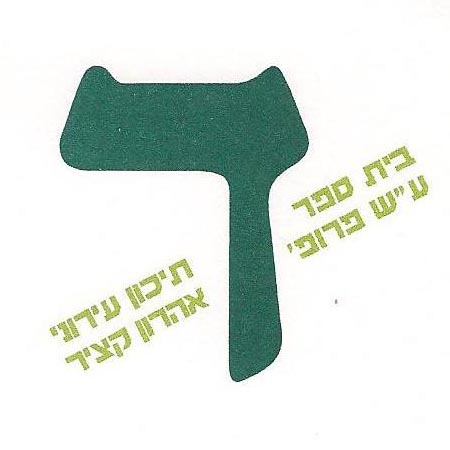

**School name: Ironi D.**

**Student name: Yorai Yaniv.**


**Research title: Fraud Detection.**


**School year: 2024.**


**Teacher's name: Itai Barly.**


## Research subject

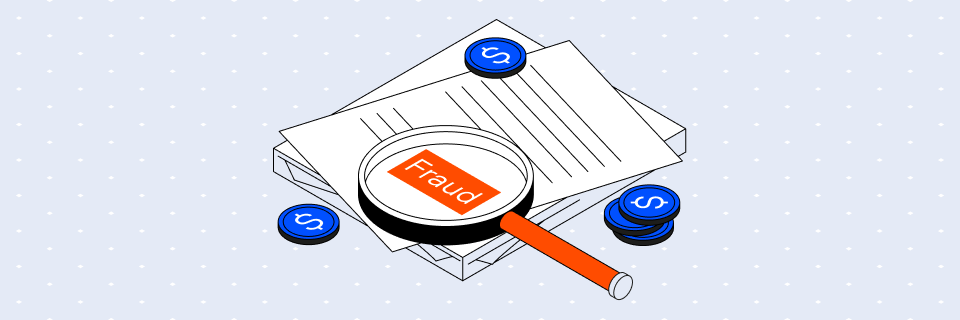



Description: The research is tageted to detect if a card transaction is a fraud or not.

## Data description

Dataset description: The dataset is a collection of card transactions, some are fraud and most are not.

Origin: Kaggle.

Autor: KELVIN KELUE.

Latest update: March 9th, 2024.


Url: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction?resource=download

**Shape of dataset: 555,719 Rows on 22 Columns.**

Trans_date_trans_time: Timestamp of the transaction (date and time).

Cc_num:Unique customer identification number.

MerchantThe merchant involved in the transaction.

Category Transaction type (e.g., personal, childcare).

Amt:Transaction amount.

First: Cardholder's first name.

Last Cardholder's last name.

Gender: Cardholder's gender.

Street: Cardholder's street address.

City: Cardholder's city of residence.

State: Cardholder's state of residence.

Zip: Cardholder's zip code.

Lat:Latitude of cardholder's location.

Long: Longitude of cardholder's location.

City_pop:Population of the cardholder's city.

Job:Cardholder's job title.

Dob: Cardholder's date of birth.

Trans_num: Unique transaction identifier.

Unix_time: Transaction timestamp (Unix format).

Merch_lat:Merchant's location (latitude).

Merch_long: Merchant's location (longitude).

Is_fraud:Fraudulent transaction indicator (1 = fraud, 0 = legitimate). This is the target variable for classification purposes.

## Data loading and preliminary preparation

In [ ]:
%pip install feature-engine # Import feature-engine for a later import

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
 # Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter(action= 'ignore', category= FutureWarning)

In [ ]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as lrn

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from typing import Callable
from sklearn.preprocessing import FunctionTransformer, \
                                  OrdinalEncoder, OneHotEncoder, \
                                  TargetEncoder, \
                                  MinMaxScaler, MaxAbsScaler, StandardScaler
from feature_engine.outliers import Winsorizer # A class that replaces outliers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import time as tm

import cloudpickle as cpkl

In [ ]:
seed = 42

In [ ]:
# Load the csv into a pandas DataFrame
# "drive/MyDrive/fraud test.csv"
orig = pd.read_csv('/content/drive/MyDrive/Colab/fraud test.csv')
orig

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
orig.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
target = 'is_fraud'

In [ ]:
orig[target].value_counts()/orig.shape[0]

is_fraud
0    0.99614
1    0.00386
Name: count, dtype: float64

In [ ]:
orig_reduced = orig.sample(n= 10000, random_state= seed)

In [ ]:
orig_reduced[target].value_counts()/orig_reduced.shape[0]

is_fraud
0    0.9968
1    0.0032
Name: count, dtype: float64

In [ ]:
X, y = orig_reduced.drop(target, axis= 1), orig_reduced[target].copy()

In [ ]:
X

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
119106,119106,02/08/2020 07:55,3.778960e+14,"fraud_Bahringer, Schoen and Corkery",shopping_pos,1.07,Kimberly,Myers,F,6881 King Isle Suite 228,...,6441,41.4682,-72.5751,5438,"Librarian, academic",17/11/1964,cf581d75ccc9ba838a05dec8bfa78b5b,1375430128,41.240083,-71.837788
179292,179292,23/08/2020 14:05,3.036410e+13,"fraud_Romaguera, Wehner and Tromp",kids_pets,94.99,Samuel,Sandoval,M,0005 Morrison Land,...,74047,35.8896,-96.0887,7163,Fitness centre manager,05/02/1982,b1bfaf13224da41f422db483fd810dd7,1377266716,35.156537,-95.806648
540729,540729,28/12/2020 16:22,3.032840e+13,fraud_Berge-Hills,kids_pets,31.28,Helen,Campbell,F,182 Sergio Summit Apt. 129,...,64630,40.0290,-93.1607,602,Cytogeneticist,14/07/1954,cde9fc0136873645778d0ad8817db655,1388247749,39.888665,-93.106804
374360,374360,14/11/2020 10:44,3.036410e+13,"fraud_Connelly, Reichert and Fritsch",gas_transport,73.06,Samuel,Sandoval,M,0005 Morrison Land,...,74047,35.8896,-96.0887,7163,Fitness centre manager,05/02/1982,90b8429191e5c83df1afba4e5db4d61e,1384425890,36.734101,-96.737345
314574,314574,19/10/2020 01:50,4.198470e+12,fraud_Kuphal-Predovic,misc_net,9.99,Christie,Williamson,F,519 Jerry Views,...,51521,41.4768,-95.3509,2036,Engineering geologist,20/08/1971,e4893795b6b3e41667129b9ed13b9650,1382147409,40.922072,-94.899388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417956,417956,01/12/2020 08:50,4.560000e+18,fraud_McCullough Group,grocery_net,73.83,Stacy,Villegas,F,20581 Pena Walks,...,80951,38.8881,-104.6556,525713,Museum/gallery exhibitions officer,09/05/1992,91f1f46d1d0e82cf759246026b90fce0,1385887849,38.274230,-104.963940
185944,185944,25/08/2020 07:33,1.800400e+14,fraud_Mraz-Herzog,gas_transport,38.46,Mary,Schmidt,F,022 Moore Island,...,10162,40.7699,-73.9511,1577385,Audiological scientist,29/12/1957,11fa6ce1131eff38654326854667d92d,1377416022,41.360172,-74.656056
545868,545868,29/12/2020 12:58,3.458320e+14,fraud_Nolan-Williamson,kids_pets,126.08,Jason,Mcmahon,M,6385 Donald Square Suite 429,...,22151,38.8029,-77.2116,104396,Production engineer,20/11/1950,f508ec5206bed46963b470316076fc95,1388321903,37.900727,-77.688746
162569,162569,17/08/2020 11:03,6.597890e+15,fraud_Schamberger-O'Keefe,grocery_pos,141.73,Bill,Lane,M,4725 Hurst Curve Apt. 634,...,76366,33.6751,-98.6576,2317,Chief Technology Officer,23/08/1964,d4ef802109656094dde70f6cc4aae97a,1376737436,34.100321,-99.042251


In [ ]:
X.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
dtype: object

In [ ]:
y.dtype

dtype('int64')

In [ ]:
y.isna().sum()

0

In [ ]:
# Check for empty rows
X.isna().all(axis= 1).sum()

0

No empty rows.

In [ ]:
X.duplicated().sum()

0

There are no duplicatons in the dataset.

In [ ]:
X_cols = X.columns.to_list()
X_cols

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long']

In [ ]:
X_vc = X.nunique() / X.shape[0]
X_vc

Unnamed: 0               1.0000
trans_date_trans_time    0.9761
cc_num                   0.0885
merchant                 0.0693
category                 0.0014
amt                      0.6632
first                    0.0337
last                     0.0464
gender                   0.0002
street                   0.0905
city                     0.0833
state                    0.0050
zip                      0.0893
lat                      0.0891
long                     0.0892
city_pop                 0.0819
job                      0.0474
dob                      0.0891
trans_num                1.0000
unix_time                0.9997
merch_lat                1.0000
merch_long               0.9998
dtype: float64

In [ ]:
empty_cutoff = 0.5
saturated_cutoff = 0.97

In [ ]:
empty_cols = X_vc[X_vc <= empty_cutoff].index.to_list()
empty_cols

['cc_num',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob']

In [ ]:
saturated_cols = X_vc[X_vc >= saturated_cutoff].index.to_list()
saturated_cols

['Unnamed: 0',
 'trans_date_trans_time',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long']

In [ ]:
set(X_cols) - set(empty_cols) - set(saturated_cols)

{'amt'}

Normally we would delete the "empty" columns,
but if we did this we would be left with a single column.

In [ ]:
# We may be able to extract useful information
# from the follwing saturated columns.
saturated_cols_to_preserve = ['trans_date_trans_time',
                              'amt',
                              'merch_lat',
                              'merch_long']
saturated_cols_to_drop = list(set(saturated_cols) - set(saturated_cols_to_preserve))
saturated_cols_to_drop

['Unnamed: 0', 'trans_num', 'unix_time']

In [ ]:
X_reduced = X.drop(saturated_cols_to_drop, axis= 1)

In [ ]:
X_reduced.shape

(10000, 19)

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)

## Data Research

In [ ]:
X_train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long
538237,28/12/2020 07:03,5.018030e+11,fraud_Gibson-Deckow,entertainment,11.83,Robert,Flores,M,3277 Fields Meadows Apt. 790,Greenview,CA,96037,41.5403,-122.9366,308,Call centre manager,20/09/1958,40.618175,-123.450000
30010,30/06/2020 23:46,3.528230e+15,fraud_Torphy-Goyette,shopping_pos,727.32,Lauren,Moreno,F,83719 Wilson Shore,Heislerville,NJ,8324,39.2240,-74.9942,526,Exercise physiologist,06/09/1940,39.889722,-74.958256
406448,28/11/2020 18:42,4.384910e+15,fraud_Kutch-Wilderman,home,46.77,Michelle,Russell,F,55505 Christy Via,Hawley,MN,56549,46.9777,-96.4092,4508,Naval architect,24/04/1949,46.009752,-95.763280
543250,29/12/2020 00:45,4.103160e+12,fraud_Ruecker Group,misc_net,92.56,Christopher,Adkins,M,3512 Knight Center,Lorenzo,TX,79343,33.6666,-101.5277,1571,Petroleum engineer,27/06/1982,33.751666,-100.910490
289743,07/10/2020 17:48,3.543590e+15,fraud_Stiedemann Inc,misc_pos,7.51,Margaret,Lam,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,40.4603,-79.0097,922,Early years teacher,04/10/1972,40.322965,-79.449527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352364,03/11/2020 22:55,4.279160e+12,fraud_Streich Ltd,home,15.87,Lisa,Hendrix,F,35737 Kirby Fall Suite 409,Vanderbilt,PA,15486,40.0246,-79.6955,2303,Physiotherapist,16/08/1987,40.074570,-79.745415
348313,02/11/2020 17:16,2.264940e+15,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,25.14,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,TX,78214,29.3641,-98.4924,1595797,Land,17/10/1995,29.209705,-97.998442
441450,06/12/2020 23:48,3.003040e+13,fraud_Crona and Sons,kids_pets,51.87,William,Jenkins,M,50614 Kevin Point,Harper,TX,78631,30.2816,-99.2410,2395,"Pharmacist, community",17/11/1993,31.223691,-98.978761
339574,29/10/2020 21:31,2.720010e+15,fraud_Schimmel-Olson,kids_pets,53.80,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,18/08/1980,43.133110,-103.433328


In [ ]:
# Let's see what is the type of each column.
X_train.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
dtype: object

For model training we need to use all numerical values. Remember for later.

In [ ]:
# The table shape
X_train.shape

(8000, 19)

In [ ]:
# We need to check for null values in data
X_train.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
dtype: int64

There are no null values in data. It's strange. One possibility is that there are filling values for null values.

In [ ]:
# Let's check the value ditribution and max min.
X_train.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long
count,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000
mean,4.113886e+17,70.150320,48886.141750,38.634914,-90.268299,9.330765e+04,38.633657,-90.265544
std,1.302462e+18,157.509101,26745.142643,5.066278,13.688438,3.222469e+05,5.090478,13.697986
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.449695,-166.543650
25%,1.800360e+14,9.530000,26292.000000,34.733575,-96.786900,7.220000e+02,34.869245,-96.816133
50%,3.523840e+15,46.885000,48210.000000,39.401500,-87.476900,2.328000e+03,39.417960,-87.498511
75%,4.634960e+15,83.610000,72042.000000,42.073700,-80.175200,1.968500e+04,42.001837,-80.330353
max,4.992350e+18,5936.800000,99783.000000,65.689900,-67.950300,2.906700e+06,66.488139,-67.046901


There isn't a sagnificant amount of a certain value, so we know the table is actually full.

In [ ]:
Xy_train = pd.concat([X_train, y_train], axis= 1)
Xy_train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
538237,28/12/2020 07:03,5.018030e+11,fraud_Gibson-Deckow,entertainment,11.83,Robert,Flores,M,3277 Fields Meadows Apt. 790,Greenview,CA,96037,41.5403,-122.9366,308,Call centre manager,20/09/1958,40.618175,-123.450000,0
30010,30/06/2020 23:46,3.528230e+15,fraud_Torphy-Goyette,shopping_pos,727.32,Lauren,Moreno,F,83719 Wilson Shore,Heislerville,NJ,8324,39.2240,-74.9942,526,Exercise physiologist,06/09/1940,39.889722,-74.958256,1
406448,28/11/2020 18:42,4.384910e+15,fraud_Kutch-Wilderman,home,46.77,Michelle,Russell,F,55505 Christy Via,Hawley,MN,56549,46.9777,-96.4092,4508,Naval architect,24/04/1949,46.009752,-95.763280,0
543250,29/12/2020 00:45,4.103160e+12,fraud_Ruecker Group,misc_net,92.56,Christopher,Adkins,M,3512 Knight Center,Lorenzo,TX,79343,33.6666,-101.5277,1571,Petroleum engineer,27/06/1982,33.751666,-100.910490,0
289743,07/10/2020 17:48,3.543590e+15,fraud_Stiedemann Inc,misc_pos,7.51,Margaret,Lam,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,40.4603,-79.0097,922,Early years teacher,04/10/1972,40.322965,-79.449527,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352364,03/11/2020 22:55,4.279160e+12,fraud_Streich Ltd,home,15.87,Lisa,Hendrix,F,35737 Kirby Fall Suite 409,Vanderbilt,PA,15486,40.0246,-79.6955,2303,Physiotherapist,16/08/1987,40.074570,-79.745415,0
348313,02/11/2020 17:16,2.264940e+15,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,25.14,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,TX,78214,29.3641,-98.4924,1595797,Land,17/10/1995,29.209705,-97.998442,0
441450,06/12/2020 23:48,3.003040e+13,fraud_Crona and Sons,kids_pets,51.87,William,Jenkins,M,50614 Kevin Point,Harper,TX,78631,30.2816,-99.2410,2395,"Pharmacist, community",17/11/1993,31.223691,-98.978761,0
339574,29/10/2020 21:31,2.720010e+15,fraud_Schimmel-Olson,kids_pets,53.80,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,18/08/1980,43.133110,-103.433328,0


The is_fraud column mean value is smaller then 0.5 so we have more non fraud records then fraud records.

In [ ]:
# Let's watch at the mean value for amount transfered at fraud and non fraud records.
Xy_train[["amt", target]].groupby([target]).mean()

,amt
is_fraud,
0,68.316996
1,632.416538


We see the there is a sagnificant difference between the mean value of amount transferred. So there may be a correlation with larger amount and a fraud.

In [ ]:
# Let's check how many different cordinates are.
Xy_train.groupby(["lat", "long"]).size().sort_values(ascending=False)

lat      long     
34.2853  -91.3336     30
43.0048  -108.8964    30
31.6489  -82.1982     27
46.1838  -101.2589    26
34.2651  -77.8670     26
                      ..
40.9540  -76.1747      1
39.8882  -79.8694      1
41.8383  -71.4377      1
42.7045  -74.3648      1
34.5189  -112.2523     1
Length: 888, dtype: int64

*There* are 899 different locations recorded.

In [ ]:
# We check for evey location if there are more non legitimate transictions or more legitimate transactions.
Xy_train[["lat", "long", target]].groupby(["lat", "long"]).agg(pd.Series.mode)

,,is_fraud
lat,long,
20.0271,-155.3697,0
20.0827,-155.4880,0
24.6557,-81.3824,0
26.1184,-81.7361,0
26.3304,-81.5871,0
...,...,...
48.8328,-108.3961,0
48.8856,-103.0098,0
48.8878,-118.2105,0


We see that for most of the places, there are more legitimate transactions.

## Grpahs

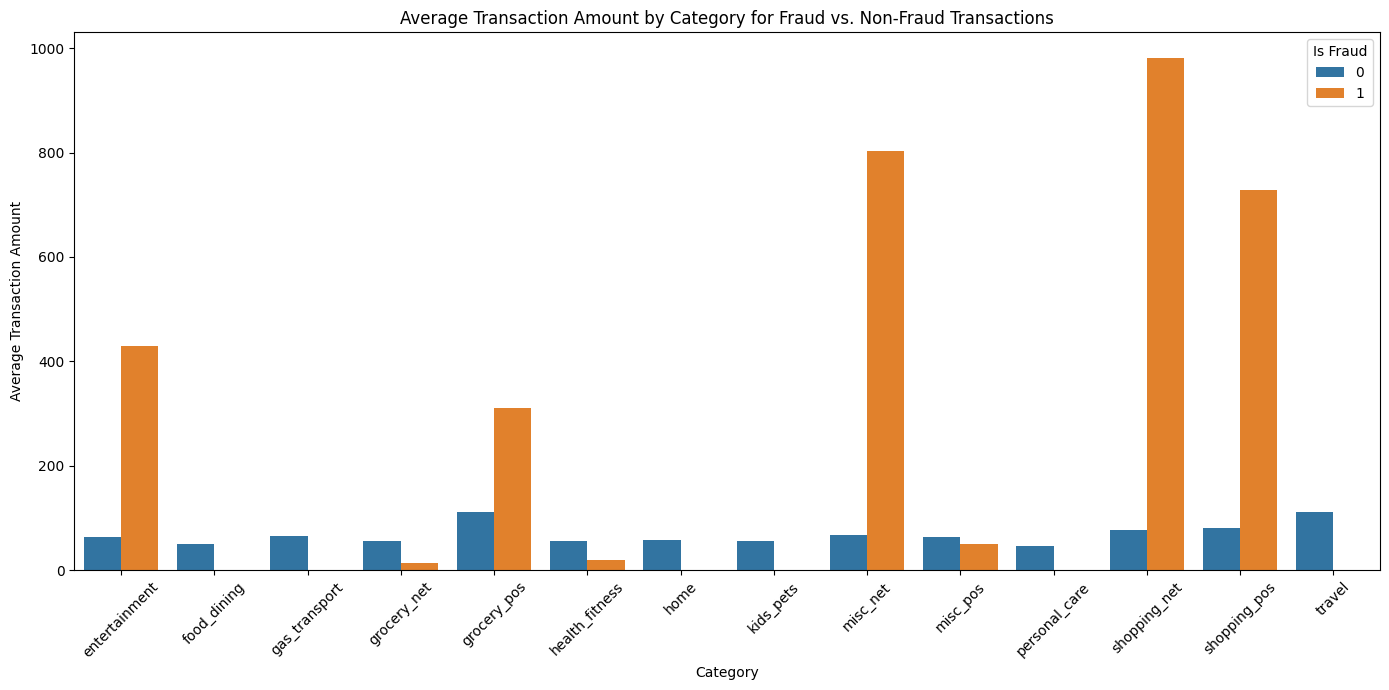

In [ ]:
avg_amt_by_category = Xy_train.groupby(['category', target])['amt'].mean().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=avg_amt_by_category, x='category', y='amt', hue=target)
plt.title('Average Transaction Amount by Category for Fraud vs. Non-Fraud Transactions')
plt.xlabel('Category')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Is Fraud', loc='upper right')
plt.tight_layout()
plt.show()

The bar plot shows the average transaction amount by category, differentiated by fraud and non-fraud transactions.

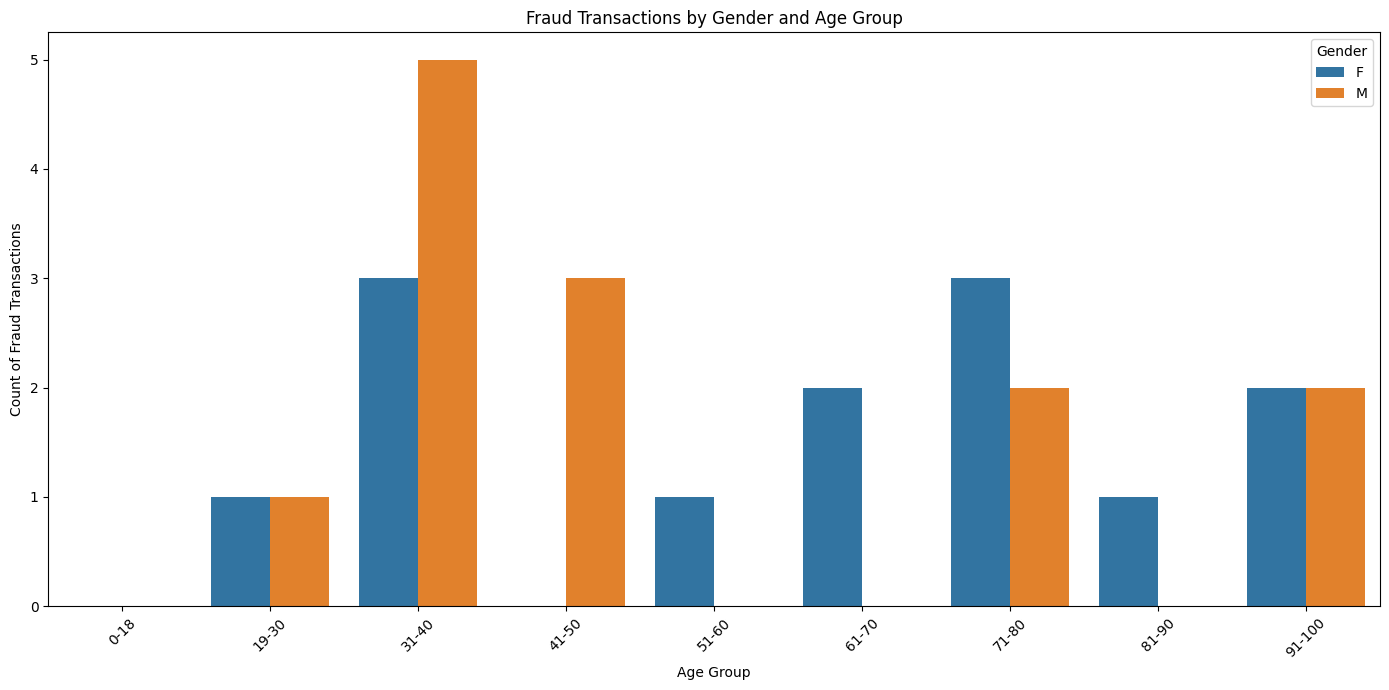

In [ ]:
# Make a copy of the original data
Xy_train_copy = Xy_train.copy()

# Create age groups
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
Xy_train_copy['age'] = pd.Timestamp.now().year - pd.to_datetime(
                                                  Xy_train_copy['dob'],
                                                  dayfirst= True,
                                                  errors= 'coerce').dt.year
Xy_train_copy['age_group'] = pd.cut(Xy_train_copy['age'], bins=bins, labels=labels, right=False)

# Calculate the count of fraud transactions by gender and age group
fraud_by_gender_age = Xy_train_copy[Xy_train_copy[target] == 1].groupby(['gender', 'age_group']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=fraud_by_gender_age, x='age_group', y='count', hue='gender')
plt.title('Fraud Transactions by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Fraud Transactions')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

The bar plot displays the count of fraud transactions by gender and age group:
* Age Group 19-30: Males have slightly more fraud
transactions than females.
* Age Group 31-40: This group shows a higher number of fraud transactions for both genders, with males having a slightly higher count.
* Age Group 41-50: Similar to the 31-40 group, both genders have a high count, with males again leading.
* Age Group 51-60: Males show a higher count of fraud transactions compared to females.
* Other Age Groups: The counts are relatively low and fairly balanced between genders.

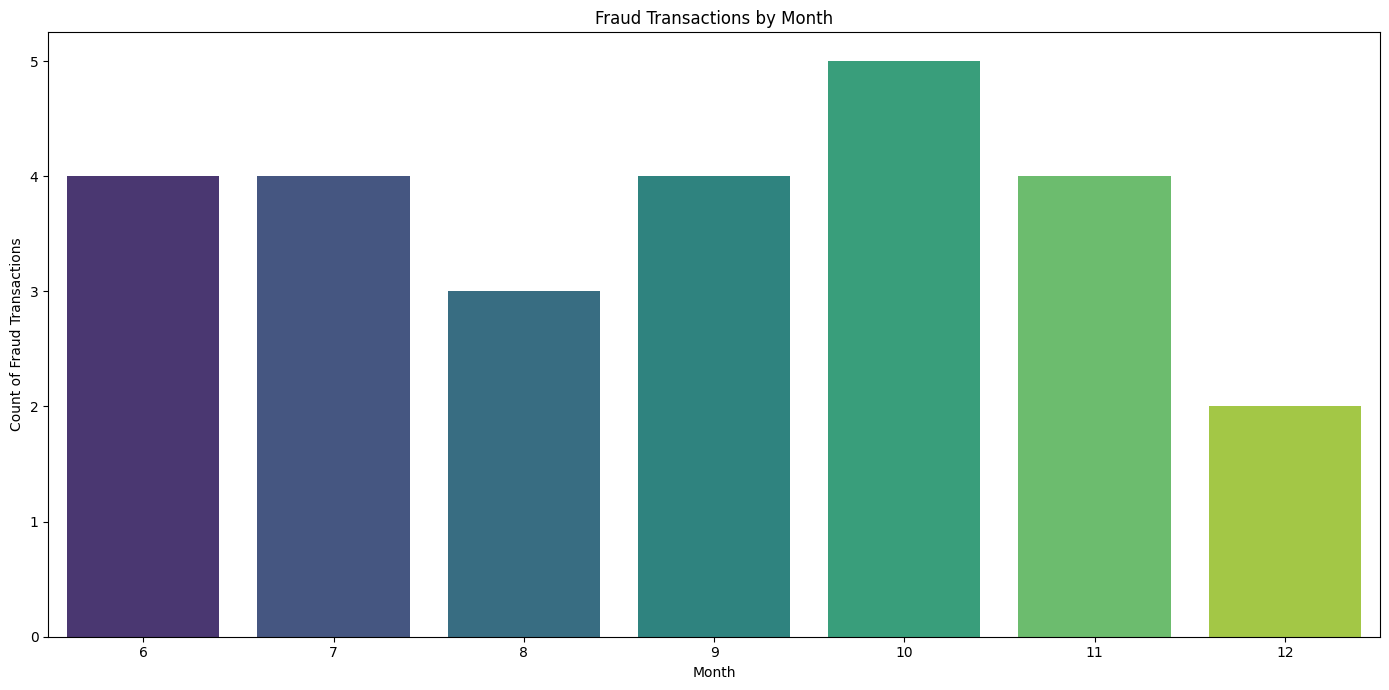

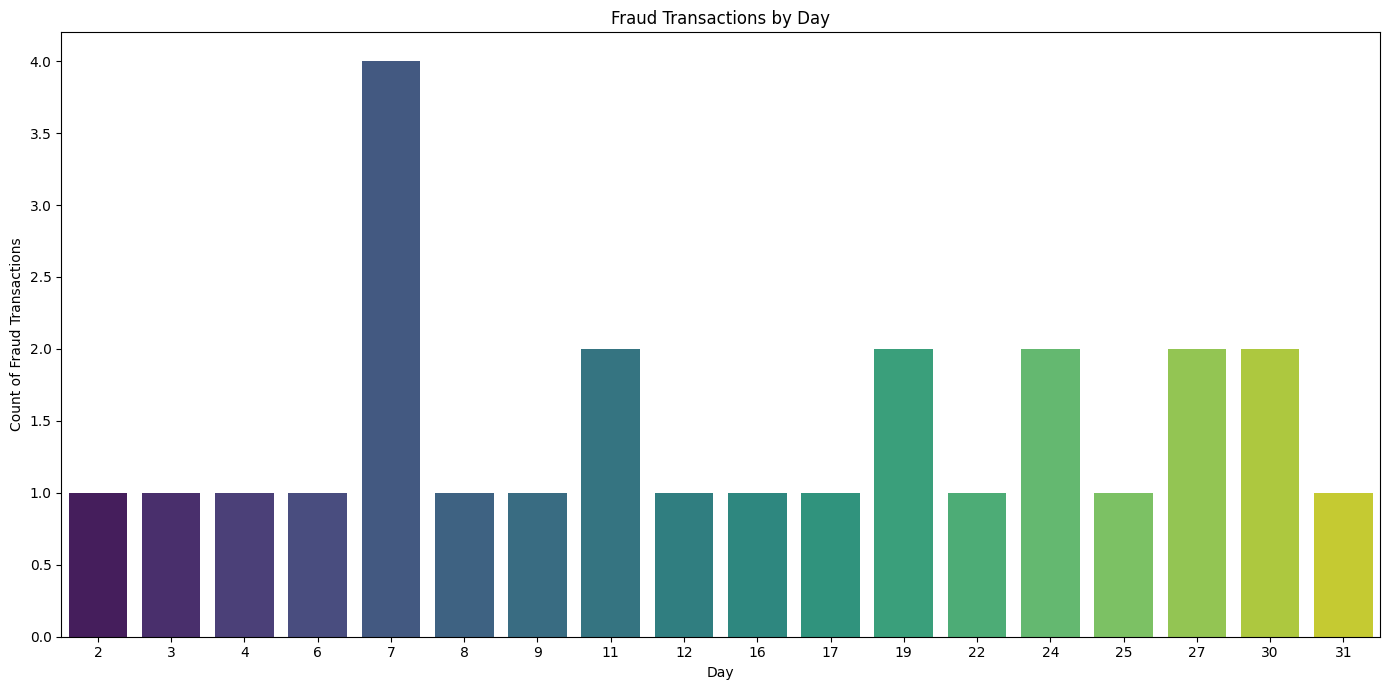

In [ ]:
Xy_train_copy = Xy_train.copy()

# Transform trans_date_trans_time column
Xy_train_copy["trans_date_trans_time"] = pd.to_datetime(Xy_train_copy["trans_date_trans_time"], dayfirst=True)

# Seperate to columns : [year, month, day, time in day (morning, noon, evening, night)]
Xy_train_copy["trans_year"] = Xy_train_copy["trans_date_trans_time"].dt.year
Xy_train_copy["trans_month"] = Xy_train_copy["trans_date_trans_time"].dt.month
Xy_train_copy["trans_day"] = Xy_train_copy["trans_date_trans_time"].dt.day
Xy_train_copy["trans_time_in_day"] = ["morning" if i.timetuple()[3] >= 6 and i.timetuple()[3] < 12 else "noon" if i.timetuple()[3] >= 12 and i.timetuple()[3] < 18 else "evening" if i.timetuple()[3] >= 18 else "night" for i in Xy_train_copy["trans_date_trans_time"]]
Xy_train_copy.drop('trans_date_trans_time', axis=1, inplace=True)

# Filter data for fraud transactions
fraud_data = Xy_train_copy[Xy_train_copy['is_fraud'] == 1]

# Plot the count of fraud transactions by month
plt.figure(figsize=(14, 7))
sns.countplot(x=fraud_data["trans_month"], palette='viridis')
plt.title('Fraud Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count of Fraud Transactions')
plt.tight_layout()
plt.show()

# Plot the count of fraud transactions by day
plt.figure(figsize=(14, 7))
sns.countplot(x=fraud_data["trans_day"], palette='viridis')
plt.title('Fraud Transactions by Day')
plt.xlabel('Day')
plt.ylabel('Count of Fraud Transactions')
plt.tight_layout()
plt.show()

The month bar plot shows the total number of fraud transactions for each month of the year. It helps in understanding if there are certain months where fraud is more prevalent. For example, there could be peaks during holiday seasons or end-of-year months.

The day bar plot shows the total number of fraud transactions for each day of the month. It can reveal if there are specific days when fraud is more likely to occur. For instance, spikes at the beginning or end of the month might indicate patterns related to payment cycles.

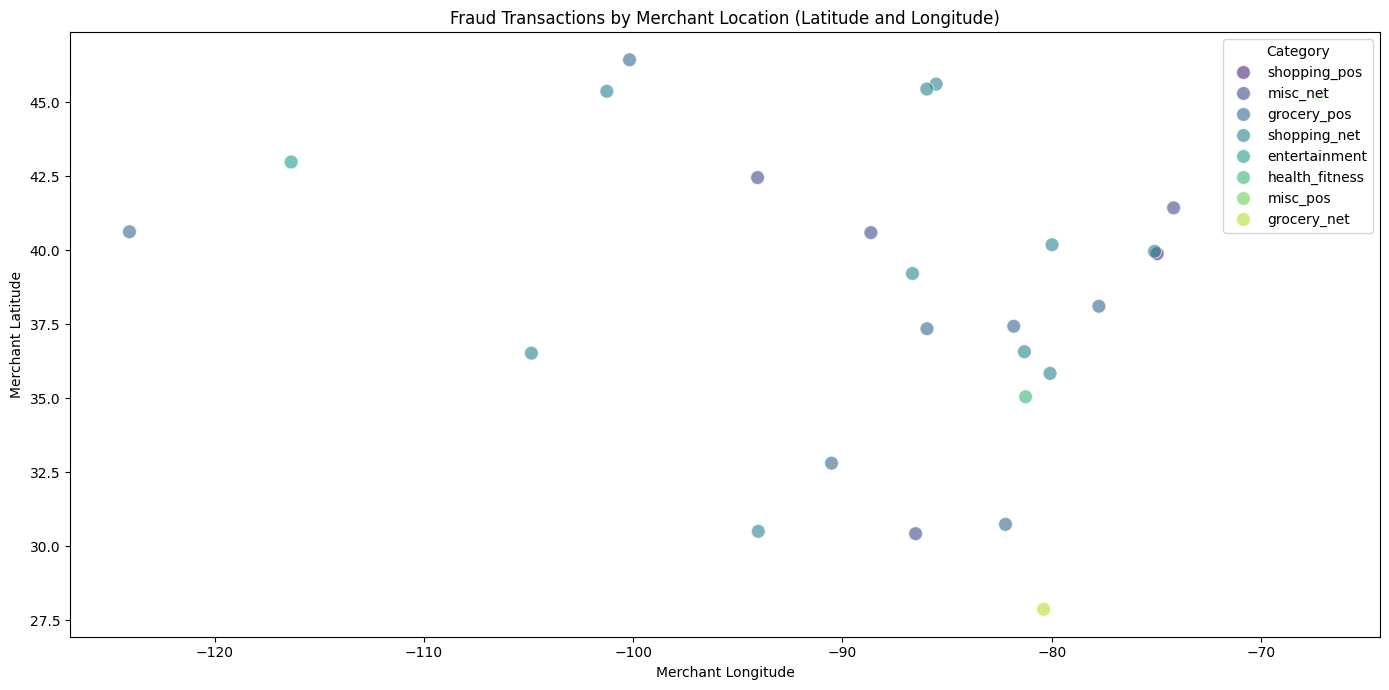

In [ ]:
# Filter data for fraud transactions
fraud_data = X_train[y_train == 1]

# Plot the scatter plot of fraud transactions by merchant location
plt.figure(figsize=(14, 7))
sns.scatterplot(x='merch_long', y='merch_lat', data=fraud_data, hue='category', palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Fraud Transactions by Merchant Location (Latitude and Longitude)')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.show()

1. Geographical Clustering:
 * Clusters: Look for clusters of points. A high density of points in certain areas indicates regions with a higher frequency of fraud transactions.
 * Isolated Points: Isolated points may indicate sporadic fraud incidents in less frequented areas.
2. Categorical Distribution:
 * Colors: The points are colored based on the transaction category. This helps in identifying which categories are more prevalent in certain geographical locations.
 * Patterns: Observe if certain categories are more concentrated in specific areas, suggesting geographical preferences or vulnerabilities for those types of fraud.

3. Latitude and Longitude Trends:
 * Latitude (Y-axis): Vertical distribution of points shows how fraud transactions are spread across different latitudes.
 * Longitude (X-axis): Horizontal distribution of points shows the spread across different longitudes.
4. Density and Spread:
 * High Density Areas: Areas with a high density of fraud points might be high-risk regions that require more attention or better fraud detection mechanisms.
 * Wide Spread: A wide spread of points indicates a widespread issue that isn't confined to specific regions.


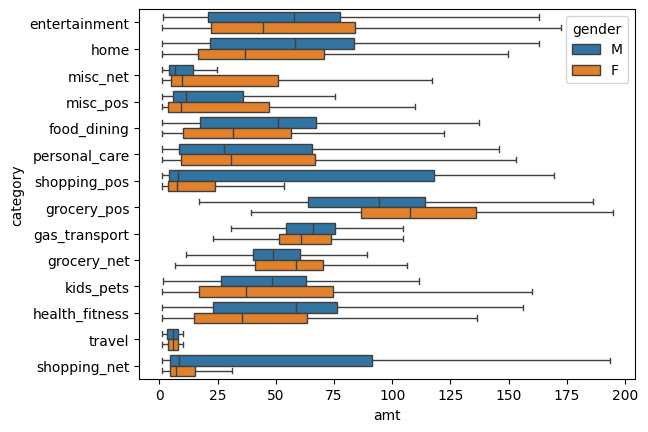

In [ ]:
boxplot_data = X_train[["amt", "category", "gender"]]
Q1 = boxplot_data['amt'].quantile(0.25)
Q3 = boxplot_data['amt'].quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

boxplot_data = boxplot_data[(boxplot_data['amt'] >= lower_bound) & (boxplot_data['amt'] <= upper_bound)]


sns.boxplot(y = "category", x = "amt", data = boxplot_data, hue = "gender", fliersize=0);

This is a boxplot that displays the distribution of transaction amounts across different categories and genders, while removing outliers based on the IQR method. The fliersize=0 parameter ensures that outliers are not plotted on the boxplot.

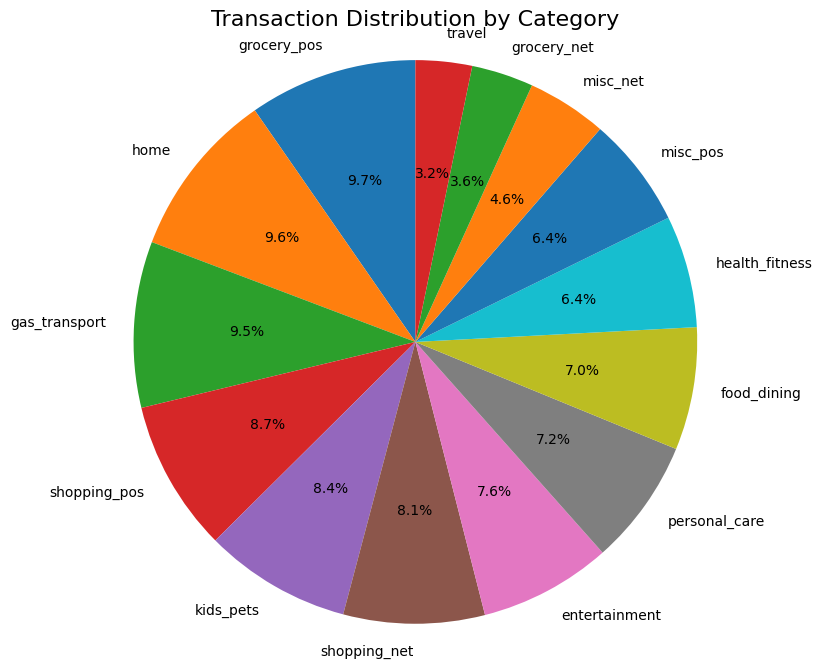

In [ ]:
category_counts = X_train['category'].value_counts()

# Create labels for the pie chart
labels = category_counts.index.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Transaction Distribution by Category', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In this pie chart:

* Each slice represents a category.
* The percentage on each slice shows the proportion of transactions in that category out of the total.
* The 'startangle' parameter rotates the pie chart so that the first slice starts from the top.
* The 'equal' aspect ratio ensures that the pie chart is drawn as a circle.

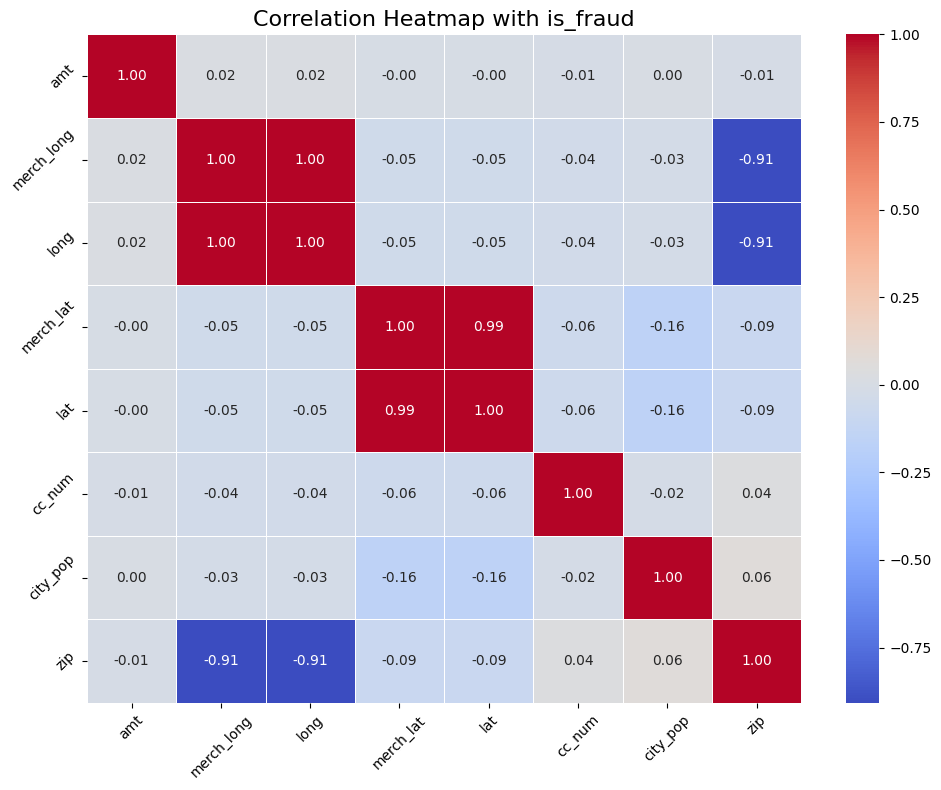

In [ ]:
# Calculate the correlation matrix
correlation_matrix = Xy_train.corr(numeric_only= True)

# Filter correlation matrix for 'is_fraud' column
fraud_correlation = correlation_matrix[target].sort_values(ascending=False)

# Select top correlated features (excluding 'is_fraud' itself)
top_correlated_features = fraud_correlation.index[1:11]  # Select top 10 features

# Filter correlation matrix for top correlated features
top_correlation_matrix = correlation_matrix.loc[top_correlated_features, top_correlated_features]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with is_fraud', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In this heatmap:

* Each cell represents the correlation coefficient between two features.
* We only consider features that are most correlated with the 'is_fraud' column.
* The annotations inside each cell display the correlation coefficient.
* The color intensity and color scale represent the strength and direction of the correlation (positive or negative).

This heatmap will help identify which features are most correlated with fraudulent transactions, providing valuable insights for fraud detection and analysis.

## Data Preprocessing

In [ ]:
lrn.set_config(transform_output= "pandas")

###Column subsets

In [ ]:
X_train.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
dtype: object

In [ ]:
all_cols = set(X_train.columns)

old_name_cols = set(['first', 'last'])
new_name_cols = set(['name'])
old_address_cols = set(['street', 'city', 'state'])
new_address_cols = set(['address'])
old_age_cols = set(['dob'])
new_age_cols = set(['age'])

num_cols = set(X_train.select_dtypes(include= "number").columns) \
           | new_age_cols
date_cols = set(['trans_date_trans_time'])
nom_cols = all_cols \
            - (num_cols  | date_cols | old_name_cols \
                        | old_address_cols | old_age_cols) \
            | (new_name_cols | new_address_cols)
nom_lc_ord_cols = set(['gender'])
nom_lc_uord_cols = set(['category'])
nom_lc_cols = nom_lc_ord_cols | nom_lc_uord_cols
nom_hc_cols = nom_cols - nom_lc_cols

###Feature engineering (fe)

####Dates to floats (number of seconds since Unix Epoch)

In [ ]:
fe_date_cols = list(date_cols)

In [ ]:
# An arbitrary, but canonical, reference date.
epoch = pd.Timestamp('1970-01-01')

# The function accepts a DataFrame
# all of whose columns are filled with dates,
# and converts them to floats representing
# the number of seconds since epoch.
# Missing values will be represented as numpy.NaN's.
def fe_date_func(df):
  df_dt = df.apply(lambda col: pd.to_datetime(col, errors= 'coerce'))
  df_days = df_dt.apply(lambda col: col.dt.to_period('D').dt.to_timestamp())
  df_days_since_epoch = df_days - epoch
  df_seconds_since_epoch = df_days_since_epoch.map(pd.Timedelta.total_seconds,
                                      na_action='ignore')
  return df_seconds_since_epoch.mask(df_seconds_since_epoch.isna(),
                                     np.NaN).astype('float')

In [ ]:
fe_date_action = FunctionTransformer(fe_date_func,
                                     feature_names_out= 'one-to-one')

####generate_col_reducing_function_transformer

In [ ]:
identity_transformer = FunctionTransformer(func= (lambda df: df),
                                           feature_names_out= 'one-to-one')

def nan_df(index: pd.Index, cols: int) -> pd.DataFrame:
  return pd.DataFrame(data= np.full(shape= (index.size, cols),
                                    fill_value= np.NaN),
                      columns= ['temp' + str(i) for i in range(cols)],
                      index= index)

def generate_col_reducing_function_transformer(feature_names_in: list[str],
                                               mapping: Callable,
                                               feature_names_out: list[str]):
  def fno(df: pd.DataFrame, input_feature: list[str]) -> list[str]:
    filler = ['temp' + str(i)
              for i
              in range(len(feature_names_in) - len(feature_names_out))]
    return feature_names_out + filler

  def func(df: pd.DataFrame) -> pd.DataFrame:
    return pd.concat([mapping(df),
                      nan_df( index= df.index,
                              cols= len(feature_names_in) - len(feature_names_out))],
                     axis= 1)

  mutate = FunctionTransformer(func= func, feature_names_out= fno)

  drop = ColumnTransformer(transformers= [('identity',
                                           identity_transformer,
                                           feature_names_out)],
                              verbose_feature_names_out= False,
                              force_int_remainder_cols= False)

  return Pipeline(steps= [('mutate', mutate),
                         ('drop', drop)])

#### Concatenate first and last names

In [ ]:
fe_name_cols = list(old_name_cols)

In [ ]:
def fe_name_func(X):
  return pd.DataFrame(data= X["first"] + " " + X["last"])

In [ ]:
new_name_cols

{'name'}

In [ ]:
fe_name_action = generate_col_reducing_function_transformer(
                  feature_names_in= fe_name_cols,
                  mapping= fe_name_func,
                  feature_names_out= list(new_name_cols))

####Concatenate addresses

In [ ]:
fe_address_cols = list(old_address_cols)

In [ ]:
# Let's see how many different locations exist in the data
X_train.groupby(fe_address_cols).size().sort_values(ascending= False)

city         state  street                     
De Witt      AR     40624 Rebecca Spurs            30
Surrency     GA     165 Jerry Meadows Suite 460    27
Shields      ND     0925 Lang Extensions           26
Thompson     UT     320 Nicholson Orchard          26
Wilmington   NC     594 Berry Lights Apt. 392      26
                                                   ..
West Monroe  LA     246 Stewart Green Suite 149     1
Howes Cave   NY     1299 Joshua Plains              1
Hills        MN     193 Catherine Ways              1
Providence   RI     90662 Lewis Avenue              1
Brainard     NE     785 Kevin Walk Suite 237        1
Length: 900, dtype: int64

In [ ]:
X_train.groupby(["city", "state"]).size().sort_values(ascending=False)

city              state
San Antonio       TX       38
Houston           TX       35
Indianapolis      IN       33
Fort Washakie     WY       30
De Witt           AR       30
                           ..
Skytop            PA        1
Hills             MN        1
West Long Branch  NJ        1
West Monroe       LA        1
Humboldt          AZ        1
Length: 859, dtype: int64

We will use the street, city and state because they are not id unique for each recoerd.

In [ ]:
def fe_address_func(df: pd.DataFrame) -> pd.DataFrame:
  return pd.DataFrame(data= df['street'] + ', ' + df['city'] + ', ' + df['state'])

In [ ]:
fe_address_action = generate_col_reducing_function_transformer(
                  feature_names_in= fe_address_cols,
                  mapping= fe_address_func,
                  feature_names_out= list(new_address_cols))

####Calculate age from dob (date of birth)

In [ ]:
fe_age_cols = list(old_age_cols)

In [ ]:
def fe_age_func(date_of_birth: pd.DataFrame) -> pd.DataFrame:
    date_of_birth_timestamp = date_of_birth.apply(
        lambda col: pd.to_datetime(col, dayfirst= True, errors= 'coerce'))
    yob = date_of_birth_timestamp.apply(lambda col: col.dt.year)
    mob = date_of_birth_timestamp.apply(lambda col: col.dt.month)
    dob = date_of_birth_timestamp.apply(lambda col: col.dt.day)

    now = pd.Timestamp.now()
    ynow = now.year
    mnow = now.month
    dnow = now.day

    # Inspired by https://stackoverflow.com/a/52251790/1818935
    return ynow - yob - ((mnow < mob) & (dnow < dob))

In [ ]:
fe_age_action = generate_col_reducing_function_transformer(
                  feature_names_in= fe_age_cols,
                  mapping= fe_age_func,
                  feature_names_out= list(new_age_cols))

####Feature engineering transformer

In [ ]:
fe_action = ColumnTransformer(transformers= [('date',
                                              fe_date_action,
                                              fe_date_cols),
                                             ('name',
                                              fe_name_action,
                                              fe_name_cols),
                                             ('address',
                                              fe_address_action,
                                              fe_address_cols),
                                             ('age',
                                              fe_age_action,
                                              fe_age_cols)],
                              remainder= 'passthrough',
                              n_jobs= -1,
                              verbose_feature_names_out= False,
                              force_int_remainder_cols= False)

###Imputation

In [ ]:
impute_date_cols = list(date_cols)
impute_num_cols = list(num_cols)
impute_nom_lc_cols = list(nom_lc_cols)
impute_nom_hc_cols = list(nom_hc_cols)

In [ ]:
impute_date_action = SimpleImputer(strategy= "median")
impute_num_action = SimpleImputer(strategy= "mean")
impute_nom_lc_action = SimpleImputer(strategy= "most_frequent")
impute_nom_hc_action = SimpleImputer(strategy= "constant", fill_value= "missing")

In [ ]:
impute_action = ColumnTransformer(transformers= [('date',
                                                  impute_date_action,
                                                  impute_date_cols),
                                                 ('num',
                                                  impute_num_action,
                                                  impute_num_cols),
                                                 ('nom_lc',
                                                  impute_nom_lc_action,
                                                  impute_nom_lc_cols),
                                                 ('nom_hc',
                                                  impute_nom_hc_action,
                                                  impute_nom_hc_cols)],
                                  remainder= 'passthrough',
                                  n_jobs= -1,
                                  verbose_feature_names_out= False,
                                  force_int_remainder_cols= False)

###Nominal to numeric

In [ ]:
nom_to_num_lc_ord_cols =  list(nom_lc_ord_cols)
nom_to_num_lc_uord_cols = list(nom_lc_uord_cols)
nom_to_num_hc_cols =  list(nom_hc_cols)

In [ ]:
nom_to_num_lc_ord_orders = [['F', 'M']]

In [ ]:
nom_to_num_lc_ord_action = OrdinalEncoder(categories= nom_to_num_lc_ord_orders,
                                          handle_unknown= 'use_encoded_value',
                                          unknown_value= -1)
nom_to_num_lc_uord_action = OneHotEncoder(sparse_output= False,
                                          handle_unknown= 'ignore')
nom_to_num_hc_action = TargetEncoder(random_state= seed)

In [ ]:
nom_to_num_action = ColumnTransformer(transformers= [ ('lc_ord',
                                                       nom_to_num_lc_ord_action,
                                                       nom_to_num_lc_ord_cols),
                                                      ('lc_urod',
                                                       nom_to_num_lc_uord_action,
                                                       nom_to_num_lc_uord_cols),
                                                      ('hc',
                                                       nom_to_num_hc_action,
                                                       nom_to_num_hc_cols)],
                                  remainder= 'passthrough',
                                  n_jobs= -1,
                                  verbose_feature_names_out= False,
                                  force_int_remainder_cols= False)

###Outliers

In [ ]:
outliers_cols = list(num_cols)

In [ ]:
outliers_cap_action = Winsorizer()

In [ ]:
outliers_action = ColumnTransformer(transformers= [ ('cap',
                                                       outliers_cap_action,
                                                       outliers_cols)],
                                  remainder= 'passthrough',
                                  n_jobs= -1,
                                  verbose_feature_names_out= False,
                                  force_int_remainder_cols= False)

###Scaler

In [ ]:
scaler_action = MinMaxScaler()

###Preprocessing pipeline

In [ ]:
preprocess_steps= [('fe', fe_action),
                   ('impute', impute_action),
                   ('nom_to_num', nom_to_num_action),
                   ('outliers', outliers_action),
                   ('scale', scaler_action)]

In [ ]:
preprocessor = Pipeline(steps= preprocess_steps)
preprocessor

Pipeline(steps=[('fe',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('date',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function fe_date_func at 0x7c8a1fbae560>),
                                                  ['trans_date_trans_time']),
                                                 ('name',
                                                  Pipeline(steps=[('mutate',
                                                                   FunctionTransformer(feature_names_out=<function generate_col_reduci...
                                                  TargetEncoder(random_state=42),
                                                  ['merchant', 'name', 'job',
                                                   'address'])],
                                   verbose_feature_names_out=False)),
                ('outliers',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('cap', Winsorizer(),
                                                  ['age', 'merch_lat',
                                                   'merch_long', 'lat', 'zip',
                                                   'cc_num', 'amt', 'long',
                                                   'city_pop'])],
                                   verbose_feature_names_out=False)),
                ('scale', MinMaxScaler())])

In [ ]:
preprocessor.fit_transform(X_train, y_train)

,age,merch_lat,merch_long,lat,zip,cc_num,amt,long,city_pop,gender,...,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,merchant,name,job,address,trans_date_trans_time
538237,0.5750,0.614390,0.433116,0.636378,0.961980,1.022077e-07,0.019995,0.437319,0.000269,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.984456
30010,0.8125,0.593248,0.920486,0.567860,0.071727,8.169841e-04,1.000000,0.927919,0.000475,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.046632
406448,0.7000,0.770875,0.711384,0.797221,0.561192,1.015357e-03,0.084501,0.708777,0.004231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.829016
543250,0.2875,0.415098,0.659651,0.403468,0.792542,9.361390e-07,0.169040,0.656399,0.001460,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989637
289743,0.4125,0.605822,0.875346,0.604431,0.148824,8.205408e-04,0.012019,0.886828,0.000848,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.559585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352364,0.2125,0.598613,0.872373,0.591542,0.144419,9.768937e-07,0.027453,0.879810,0.002151,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.699482
348313,0.1125,0.283273,0.688919,0.276196,0.781083,5.244562e-04,0.044568,0.687459,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.694301
441450,0.1375,0.341727,0.679066,0.303336,0.785316,6.939859e-06,0.093917,0.679799,0.002238,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.870466
339574,0.3000,0.687384,0.634295,0.689987,0.573443,6.298324e-04,0.097480,0.646029,0.001041,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.673575


##Machine Learning

###Classifier pipeline

In [ ]:
placeholder_classifier = KNeighborsClassifier()

In [ ]:
classify_steps= [ ('preprocess', preprocessor),
                  ('classify', placeholder_classifier)]

In [ ]:
clf = Pipeline(steps= classify_steps)

### Data balancing

In [ ]:
y_train.value_counts()

is_fraud
0    7974
1      26
Name: count, dtype: int64

In [ ]:
X_train.to_csv("/content/drive/MyDrive/Colab/X_train.csv", index_label = "index")
y_train.to_csv("/content/drive/MyDrive/Colab/y_train.csv", index_label = "index")

In [ ]:
# run code in file OverSampler.ipynb

In [ ]:
X_train_resampled = pd.read_csv("/content/drive/MyDrive/Colab/X_rsm.csv", index_col = "index")
y_train_resampled = pd.read_csv("/content/drive/MyDrive/Colab/y_rsm.csv", index_col = "index")

In [ ]:
y_train_resampled.value_counts()

is_fraud
0           7974
1           7974
Name: count, dtype: int64

###Grid search

In [ ]:
grid = [{
          'preprocess__scale': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
          'classify': [KNeighborsClassifier()],
          'classify__n_neighbors': [1,2,3,4,5]
         },
         {
           'preprocess__scale': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
           'classify': [SVC(random_state=seed)],
           'classify__C': [1, 10, 100],
           'classify__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
          }]

In [ ]:
gs = GridSearchCV(estimator= clf,
                  param_grid= grid,
                  verbose= 10,
                  n_jobs= -1,
                  scoring= 'f1',
                  error_score= 'raise')

In [ ]:
gs_path = '/content/drive/MyDrive/Colab/gs.cpkl'
fit_duration_path = '/content/drive/MyDrive/Colab/fit_duration.cpkl'

In [ ]:
# Execute this cell only once,
# and then comment out the entire cell.

fit_start = tm.time()
gs.fit(X_train_resampled, y_train_resampled)
fit_end = tm.time()
fit_duration = fit_end - fit_start

with open(gs_path, 'wb') as f:
  cpkl.dump(gs, f)

with open(fit_duration_path, 'wb') as f:
  cpkl.dump(fit_duration, f)

Fitting 5 folds for each of 51 candidates, totalling 255 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
with open(gs_path, 'rb') as f:
  gs = cpkl.load(f)

with open(fit_duration_path, 'rb') as f:
  fit_duration = cpkl.load(f)

In [ ]:
print("Fitting time: " + str(fit_duration))

Fitting time: 212.0654776096344


In [ ]:
gs.best_params_

{'classify': KNeighborsClassifier(),
 'classify__n_neighbors': 1,
 'preprocess__scale': MinMaxScaler()}

## Performence research

In [ ]:
y_pred = gs.predict(X_test)

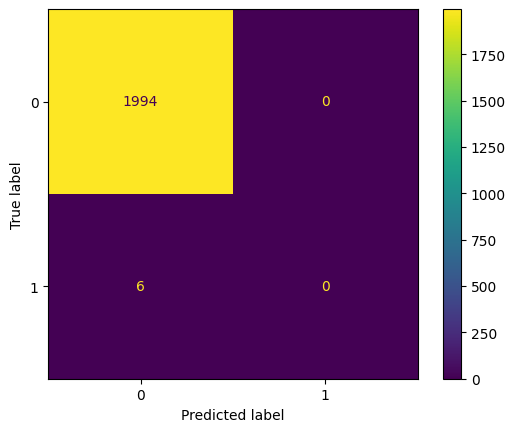

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1994
           1       0.00      0.00      0.00         6

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      1.00      1.00      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Summary

The dataset includes various features related to financial transactions such as transaction type, different categories, transaction date and time, and more.
Using a diverse set of features allows for a comprehensive analysis of transactions and identification of various fraud patterns.

The model's performance is measured using classification report and confusion matrix.
A grid search (GridSearchCV) was used to find the best parameters for the model, which contributes to improved performance.

Personal Reflection

Building machine learning models requires a deep understanding of the data, including steps for data cleaning and feature engineering.
Finding optimal parameters and using validation techniques to enhance the model's efficiency.
Understanding different performance metrics and how to interpret them.

Challenges in the Learning Process and Project Writing:

- Balancing the number of features with the model's performance: more features can enrich the model but also lead to overcomplexity.
- Managing large datasets and ensuring quick processing capabilities.
 - Handling missing or inaccurate data.

Interesting Learning Topics:

- Feature Engineering: How to transform raw data into useful information for the model.
- Data Balancing: Techniques like SMOTE to handle imbalances between categories.
- Validation Methods and Performance Evaluation: K-fold cross-validation and using advanced performance metrics.

Topics I Explored Independently:

- Grid Search and finding optimal parameters.
- Visualization tools to illustrate model performance.
- Advanced techniques for handling missing data and improving the quality of existing data.

Summary:

This project provided in-depth knowledge in the field of machine learning, particularly in financial fraud detection. It presented various challenges but also equipped you with tools and insights to address them, which will help in tackling similar problems more effectively in the future.







